# 0.0 - Imports

In [1]:
import pandas as pd
import numpy as np
import time

from IPython import display
from sklearn import cluster as c
from sklearn import datasets as dt
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

/home/aderaldo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1.0 - Load Dataset

In [2]:
X = pd.read_csv("/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/clusterização/X_dataset.csv")

In [28]:
X.shape

(178, 13)

# 2.0 - Training

## 2.1 - Fine tuning

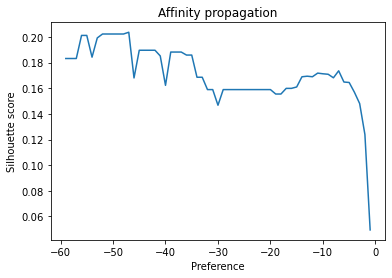

O número de preference: 59
O número de Slhouette score é: 0.18318135469996977


<Figure size 432x288 with 0 Axes>

In [3]:
p = np.arange( -1, -61, -1)
ss_list = []
preference_list = []

for preference in range (len (p) ):
    # Define
    model = c.AffinityPropagation( preference = p[preference], random_state = 5)
    # fit
    model.fit( X )
    # predict
    labels = model.predict( X )
    ss = silhouette_score( X, labels )
    ss_list.append( ss )
    preference_list.append( preference )
    plt.plot( p[:preference], ss_list[:preference])
    plt.title('Affinity propagation')
    plt.xlabel('Preference')
    plt.ylabel('Silhouette score')
    display.clear_output( wait=True )
    plt.show()
    plt.gcf()
    time.sleep( 0.08 )
    print( "O número de preference: {}".format(preference))
    print("O número de Slhouette score é: {}".format( ss ))

In [4]:
best_preference = ss_list.index( max(ss_list))
result = max( ss_list )
print("O melhor valor de preference: {} com {}" .format( best_preference, result ) )

O melhor valor de preference: 46 com 0.20365750456597356


# 3.0 - Plot

In [6]:
best_model = c.AffinityPropagation( preference = 46, random_state = 5)
best_model.fit( X )
labels = model.predict( X )

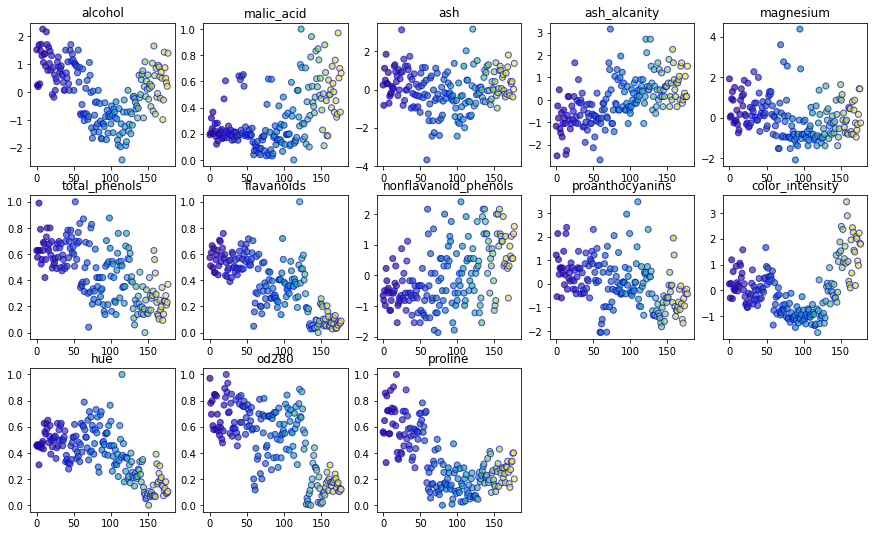

In [7]:
plt.figure( figsize=(15, 9) )
name = X.columns.tolist()
for p in range( len( name ) ):
    plt.subplot( 3, 5, p+1 )
    plt.scatter( range(len(X)), X.loc[:, name[p] ], alpha=0.7, edgecolors='b', c=best_model.labels_ )
    plt.title( name[p] )